# Read these instructions completely in order to receive full credit

- Before you submit the problem set, make sure everything runs as expected. Go to the menu bar at the top of Jupyter Notebook and click `Kernel > Restart & Run All`. Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

- You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions. The `stop()` functions produce an error and are there to remind you of cells that need an answer.

- If you are working in a group, make sure you and your collaborators have been [added to a group on Canvas](https://umich.instructure.com/courses/270337/discussion_topics/658777). 
- As a backup, *also* fill in your uniqid as well as those of your collaborators below:

Your uniqid: sebbyfay

Uniqids of your collaborator(s): aasbeck, zavend, aakang

- To submit this assignment, save it as a PDF by selecting `File > Download as > PDF via LaTeX (.pdf)`:

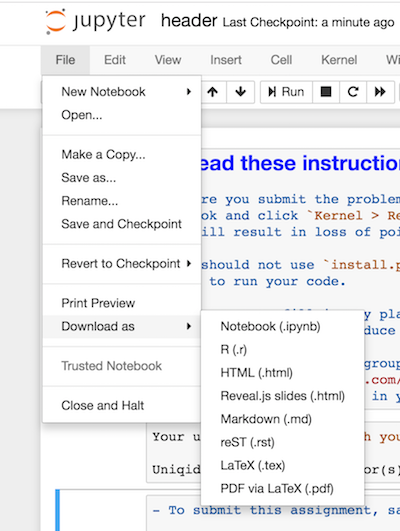

- A .pdf will be downloaded to your computer. Submit this file to Canvas.

---

In [2]:
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# STATS 306
## Problem Set 1: Plotting with `ggplot`

- Each problem is worth one to four points, depending on difficulty, for a total of 20. 
- For each problem, enter the R code in the cell provided which reproduces the plot. Your code should print this plot in the notebook. 
- Your plot should match the colors, axis labels & titles, plot type, orientation, and so forth. We do not care about minor visual differences in the font, plot width or height, placement of labels or annotations, etc. Using a different color scheme is fine.

#### Problem 1 (1 pt.)
Use the `tribble` command and `ggplot` to generate the following plot:
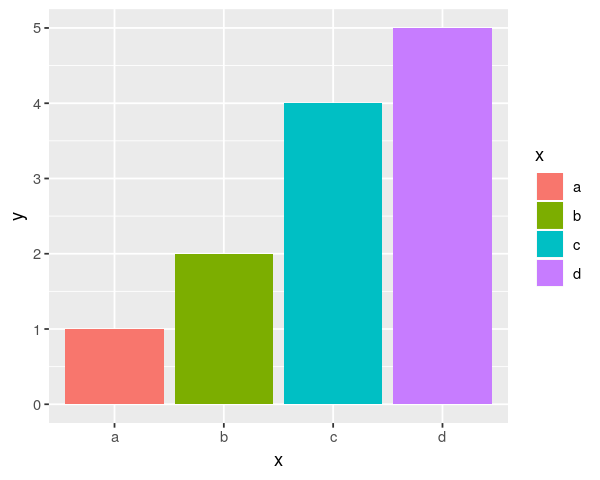

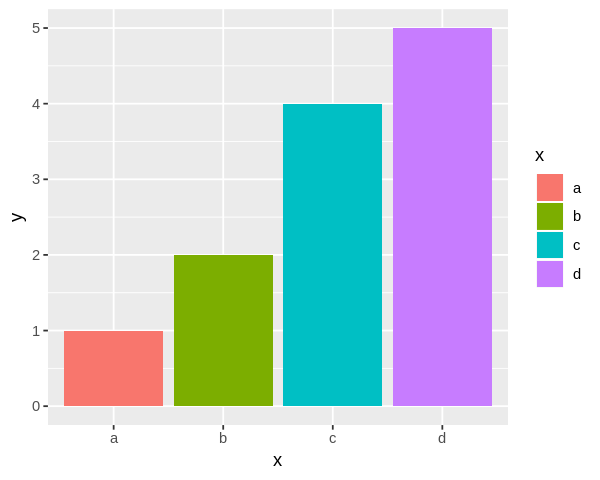

In [5]:
# YOUR CODE HERE
df = tribble(
   ~x, ~y,
   "a", 1,
   "b", 2,
   "c", 4,
   "d", 5
)
ggplot(df) + geom_col(aes(x=x, y=y, fill = x))

#### Problem 2 (3 pts.)
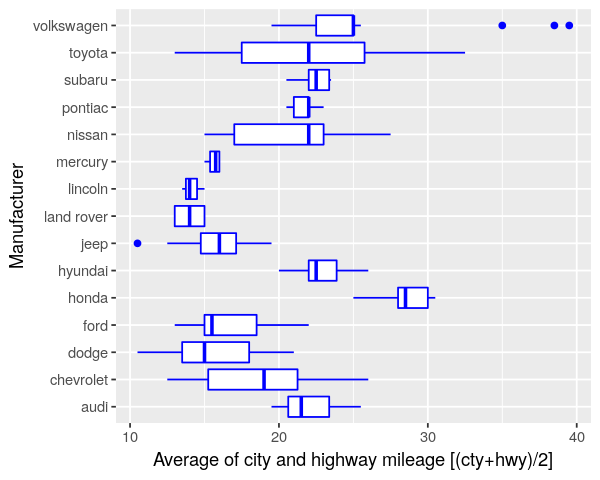

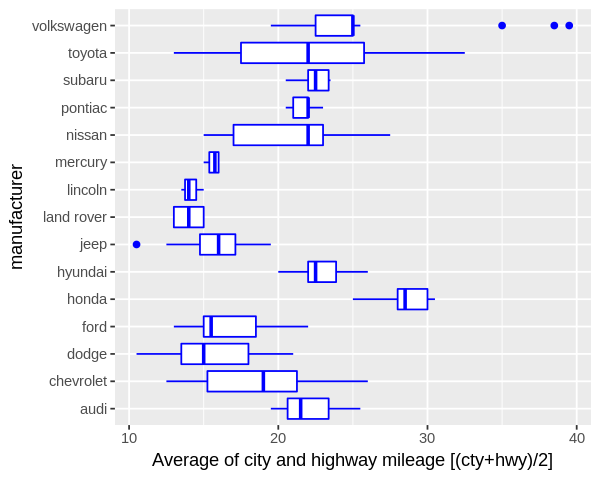

In [18]:
ggplot(data = mpg) + 
geom_boxplot(mapping = aes(x = manufacturer, y = (hwy + cty)/2), color = "blue") + 
coord_flip() + 
labs(y = "Average of city and highway mileage [(cty+hwy)/2]")


#### Problem 3 (3 pts.)

This plot is based off the `animals` table, which is defined for you in the next cell.
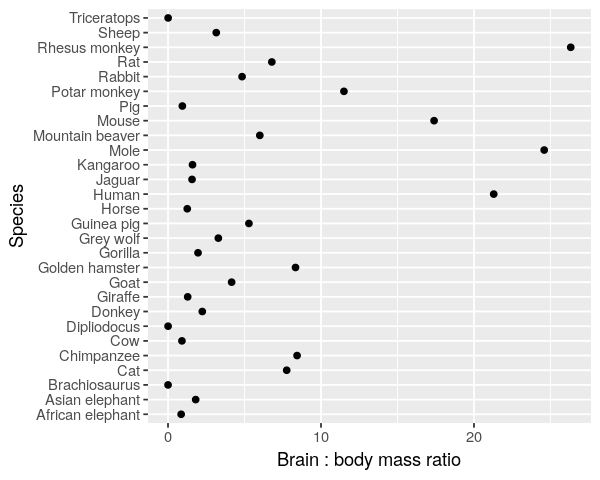

In [20]:
library(MASS)
animals <- as_tibble(MASS::Animals) %>% mutate(species = rownames(MASS::Animals))


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



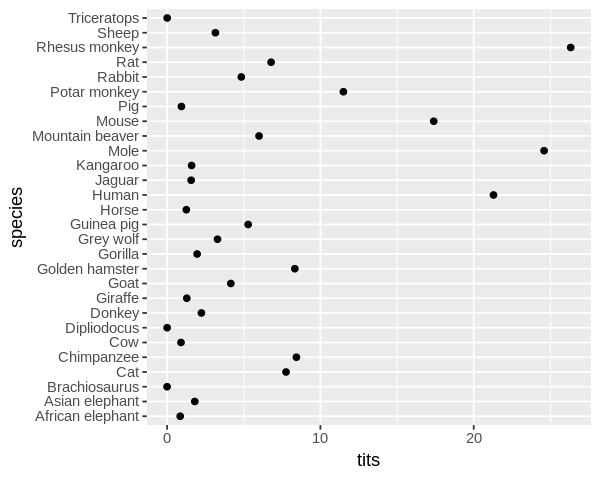

In [26]:
ggplot(data=animals) + geom_point(aes(x=brain/body, y = species)) + xlab('Brain:body mass ratio')

#### Problem 4 (3 pts.)
The top five most common air carriers in the `flights` table are:

In [5]:
flights_top5 <- count(flights, carrier) %>% top_n(5)

Selecting by n


The following command filters the `flights` table to only flights by those carriers:

In [32]:
print(filter(flights, carrier %in% flights_top5$carrier))

# A tibble: 248,312 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 248,302 more row

Using this table, recreate the following plot showing which of the top five carriers depart out of each of the three NYC airports:
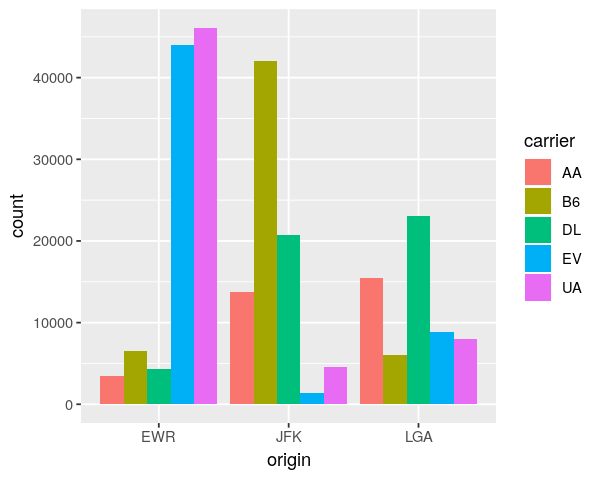

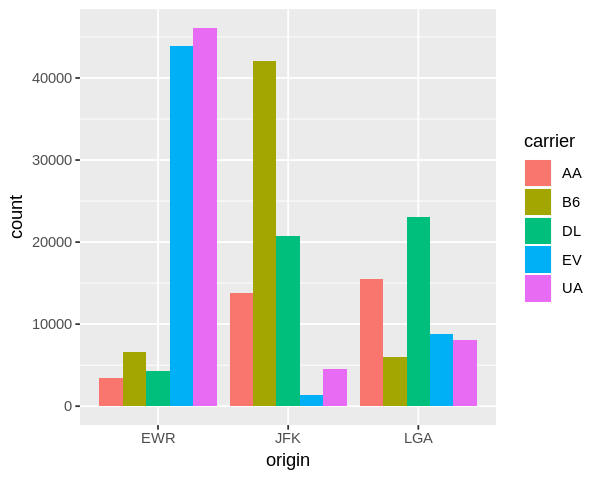

In [6]:
ggplot(data = filter(flights, carrier %in% flights_top5$carrier)) + 
geom_bar(mapping = aes(x = origin, fill = carrier), position = "dodge")

#### Problem 5 (3 pts.)
(Hint: for this plot, you will need figure out how to manually manipulate the ticks on the $x$ and $y$ axes.)
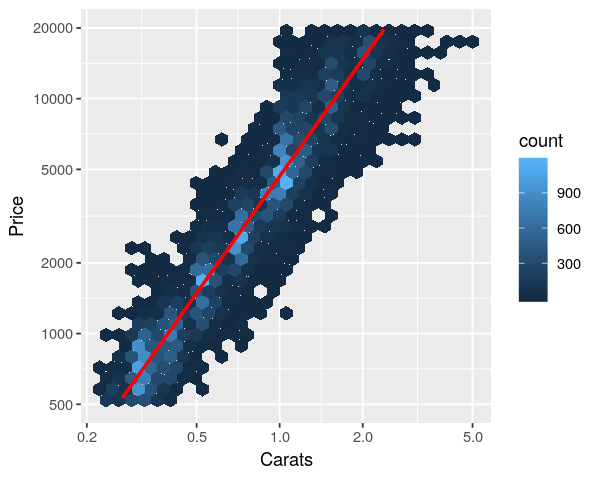

Warning message:
“Removed 1729 rows containing non-finite values (stat_binhex).”Warning message:
“Removed 1729 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_hex).”Warning message:
“Removed 23 rows containing missing values (geom_smooth).”

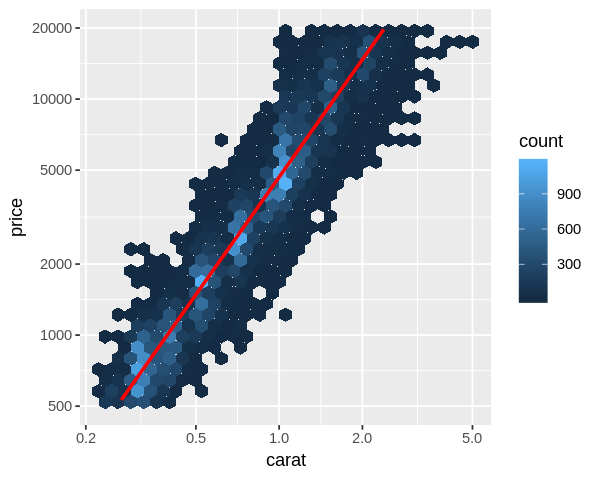

In [4]:
# YOUR CODE HERE
#?geom_hex
ggplot(data = diamonds, aes(x = carat, y = price)) + 
geom_hex(bins=30) +
scale_x_log10(breaks=c(0.2,0.5,1.0,2.0,5.0)) +
scale_y_log10(breaks=c(500,1000,2000,5000,10000,20000), limits = c(500,20000)) + 
geom_smooth(method="lm", color="red") 

## Challenge Problems
Each problem set will feature one or two questions that go a bit beyond what we have covered in lab and lecture. The goal of these is for you learn how to use online resources (R's help, Google, Stack Overflow, etc.) to solve programming challenges that you have not encountered before. This is an important skill which you will use constantly as data scientists in the real world.

#### Problem 6 (4 pts.)
Reproduce the following plot using the `midwest` table on socioeconomic data from midwestern towns. (See `?midwest` for more info; we ran out of time, but it also appears in the notes at the end of lecture 2.)
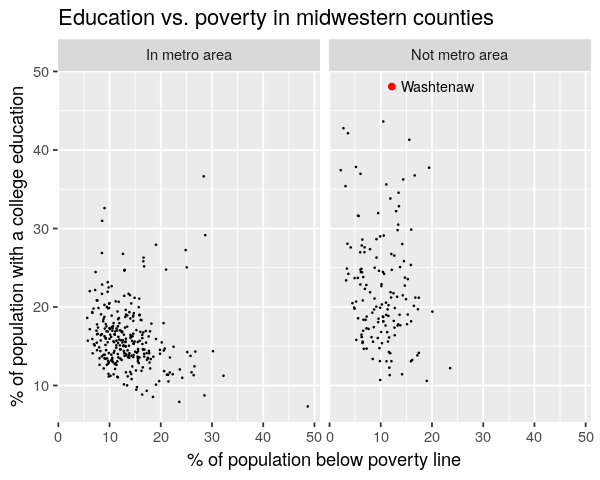

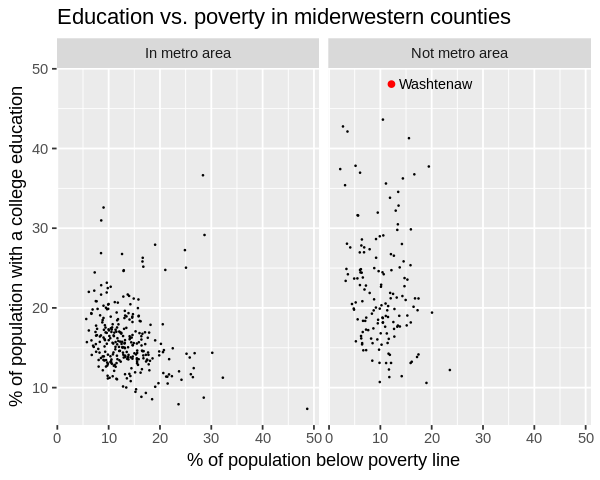

In [87]:
labels <- c("0"="In metro area","1"="Not metro area")
ggplot(data = midwest) +
geom_point(mapping = aes(x = percbelowpoverty, y=percollege), size=0.1) +
geom_point(data = filter(midwest, county == "WASHTENAW", inmetro == 1), aes(x =percbelowpoverty, y=percollege), color="red") + 
geom_text(data = filter(midwest, county == "WASHTENAW", inmetro == 1), aes(x=percbelowpoverty, y=percollege, label = "Washtenaw"), hjust = -0.1, size=3) +
facet_wrap(~inmetro, labeller=labeller(inmetro=labels)) +
labs(x="% of population below poverty line", y="% of population with a college education") +
ggtitle("Education vs. poverty in miderwestern counties")


#### Problem 7 (4 pts.)
Thus far we have only plotted "real" data, but we can just as easily use `ggplot` to visualize synthetic data. A [*harmonograph*](https://en.wikipedia.org/wiki/Harmonograph) is a special type of mathematical function whose $x$ and $y$ coordinates vary parametrically as a function of $t$:

$$
\begin{align}
x(t) &= \sin (f_1t + p_1) e^{-d_1t} + \sin (f_2t + p_2) e^{-d_2t} \\
y(t) &=  \sin (f_3t + p_3) e^{-d_3t} + \sin (f_4t + p_4) e^{-d_4t}
\end{align}
$$

The parameters $f_i$, $p_i$ and $d_i$ can be chosen to vary the appearance of the plot. 

We can create a plot of this function by choosing parameters and plotting $x$ and $y$ for different values of $t$. 

For this problem there is no single correct answer. Play with some values of the parameters and plot the resulting function over a range of $t$ values. To do so you will need to:
- Use the `seq()` function can be used to generate such a range. 
- Pick some values for the parameters $f_1,f_2,\dots$ and generate $x(t)$ and $y(t)$, storing the resulting points in a data frame using the `tibble()` function.
- Plot the resulting data frame.

Repeat until you get something you are satisfied with. 

Some of my best attempts were:

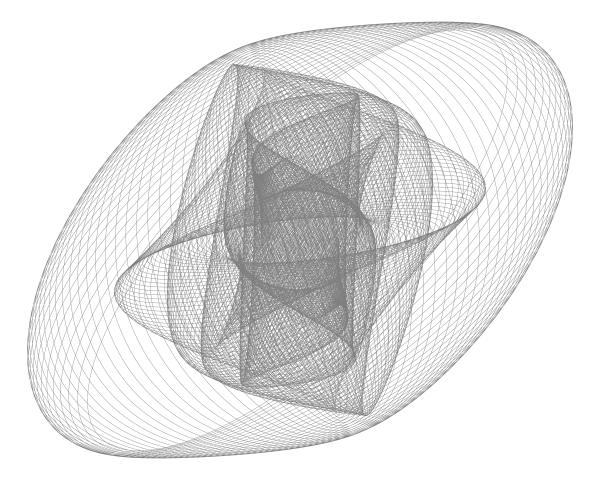

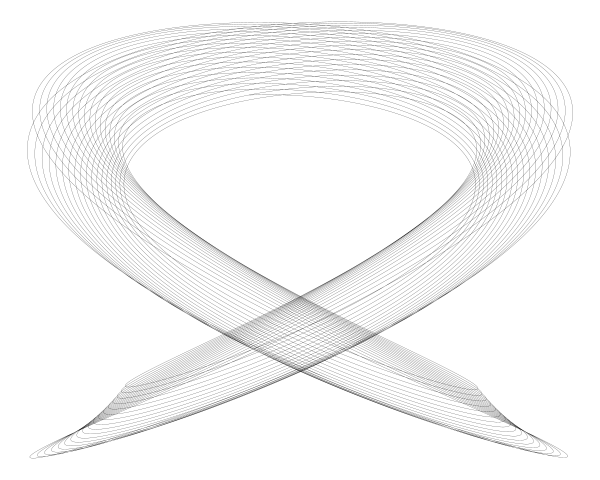

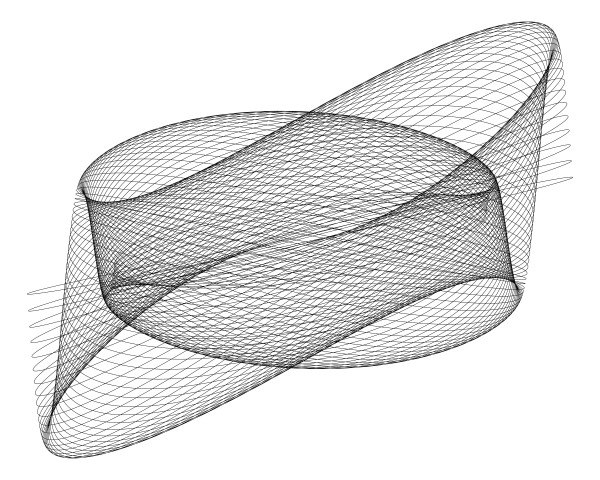

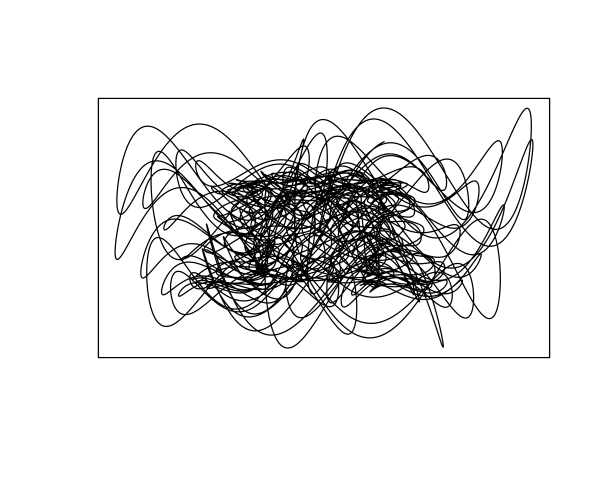

In [73]:

xt = function(t) sin(.11*t+pi)*(exp(-0.0004*t))+sin(.01*t+pi/4)*(exp(-0.00007*t))
yt = function(t) sin(.31*t+pi/2)*(exp(-0.001*t))+sin(.021*t+pi/7)*(exp(-0.00005*t))

t=seq(1, 10000, by=.8)
graph_data=data.frame(t=t, x=xt(t), y=yt(t))
with(data, plot(x,y, type="l", xaxt='n', yaxt='n', xlab="", ylab=""))
#ggplot(data = graph_data) + geom_line(mapping = aes(x=x, y=y), size=0.08)
#?plot